In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [3]:
def get_nsl_results(net_type, deck):
    # need to build array of results for noise pcts
    acc = []
    
    # get standard
    np_0 = json.loads(open('../nsl/network_acc/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0']['card_accuracy'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/network_acc/'+net_type+'/'+deck+'.json').read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)]['card_accuracy'])
    return acc

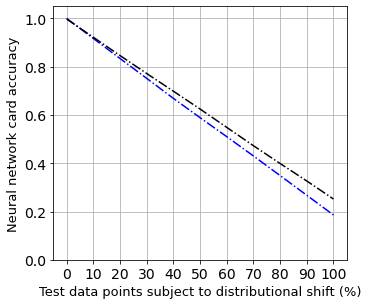

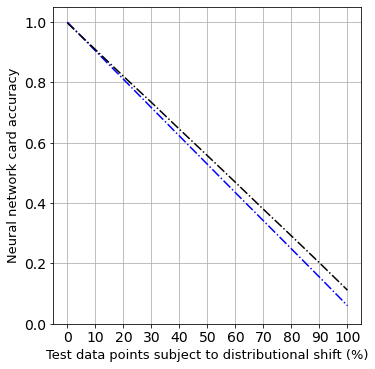

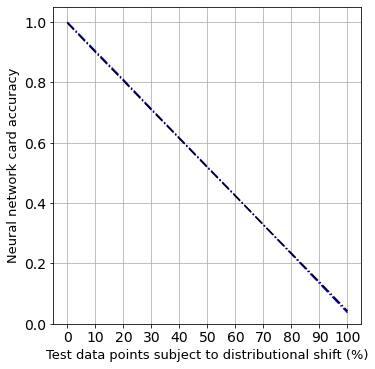

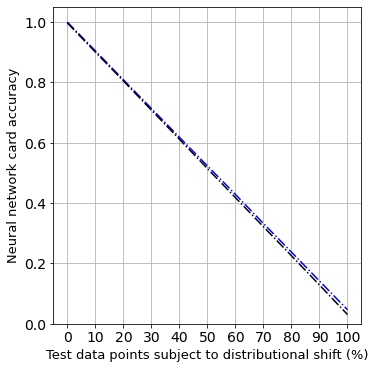

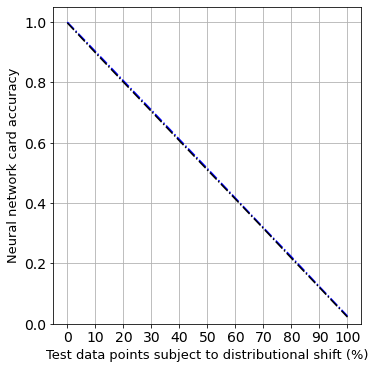

In [8]:
nps_x = [0]+noise_pcts
for i in range(5):
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    # NSL
    nsl_acc = get_nsl_results('softmax', decks[i])
    axes.plot(nps_x, nsl_acc, label = "Softmax", color="b", linestyle='-.')
    
    # EDL-GEN
    nsl_acc = get_nsl_results('edl_gen', decks[i])
    axes.plot(nps_x, nsl_acc, label = "EDL-GEN", color="k", linestyle='-.')

    axes.set_xticks(nps_x)
    NEW_FONT_SIZE = 13
    axes.set_xlabel('Test data points subject to distributional shift (%)', fontsize=NEW_FONT_SIZE)
    axes.set_ylabel('Neural network card accuracy', fontsize=NEW_FONT_SIZE)
    axes.set_ylim([0,1.05])
    axes.grid(True)
    legend = axes.legend(bbox_to_anchor=(1.05, 1.25), fontsize=9,ncol=3, borderaxespad=0, )

    def export_legend(legend, filename="follow_suit_network_acc_legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')

    if i == 0:
        export_legend(legend)
    axes.get_legend().remove()
    plt.savefig('network_accuracy/'+decks[i]+'_follow_suit_network_accuracy_results.pdf', format='pdf', bbox_inches='tight')
